<img src="https://5264302.fs1.hubspotusercontent-na1.net/hubfs/5264302/Demo%20Asset%20Resources/Demo%20Covers/CM-Demo-futures_overview.png" width=1100 margin-left='auto' margin-right='auto'/>

This notebook demonstrates basic functionality offered by the Coin Metrics Python API Client and **Market Data Feed.**

Coin Metrics offers a vast assortment of data for hundreds of cryptoassets. The Python API Client allows for easy access to this data using Python without needing to create your own wrappers using `requests` and other such libraries.

## Resources
To understand the data that Coin Metrics offers, feel free to peruse the resources below.

- The [Coin Metrics API v4](https://docs.coinmetrics.io/api/v4) website contains the full set of endpoints and data offered by Coin Metrics.
- The [Coin Metrics Product Documentation](https://docs.coinmetrics.io/info) gives detailed, conceptual explanations of the data that Coin Metrics offers.
- The [API Spec](https://coinmetrics.github.io/api-client-python/site/api_client.html) contains a full list of functions.

## Notebook Setup

In [1]:
import os
from os import environ
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import logging
from datetime import date, datetime, timedelta
from coinmetrics.api_client import CoinMetricsClient
import json
import logging
from pytz import timezone as timezone_conv
from datetime import timezone as timezone_info
import matplotlib.ticker as mticker
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
sns.set_theme()
sns.set(rc={'figure.figsize':(8,6)})

In [3]:
logging.basicConfig(
    format='%(asctime)s %(levelname)-8s %(message)s',
    level=logging.INFO,
    datefmt='%Y-%m-%d %H:%M:%S'
)
now = datetime.utcnow()
last_day_date_time = now - timedelta(hours = 24)

In [4]:
# We recommend privately storing your API key in your local environment.
try:
    api_key = environ["CM_API_KEY"]
    logging.info("Using API key found in environment")
except KeyError:
    api_key = ""
    logging.info("API key not found. Using community client")

client = CoinMetricsClient(api_key)

2024-09-16 16:41:57 INFO     Using API key found in environment


# Futures Catalog

Futures contracts are standardized contracts that allow counterparties to enter into an agreement to buy or sell a standardized asset under contract specifications that are defined by the exchange. Each specific futures contract offered by a specific exchange will have identical contract specifications regardless of who is the counterparty. 

The contract specifications include information such as the underlying base and quote asset, the margin asset, the contract size, the listing time, expiration time, and other terms. 

Coin Metrics offers contract specifications for both futures and options. Here we define futures to include both non-perpetual futures that expire and perpetual futures (sometimes called perpetual swaps).  

In [5]:
market_reference = client.reference_data_markets(
    type='future',
    page_size=10000
).to_dataframe()

/Users/victorramirez/opt/anaconda3/lib/python3.8/site-packages/coinmetrics/_data_collection.py:281: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df: pd.DataFrame = pd.read_csv(


In [6]:
print('Total number of supported futures markets: ' + str(len(market_reference)))

Total number of supported futures markets: 18682


In [7]:
# Perpetual futures markets are any futures market with null expiration
print('Total number of perpetual futures markets: ' + str(len(market_reference.loc[market_reference['expiration'].isna()])))

Total number of perpetual futures markets: 4222


In [8]:
# Filter by base or quote asset
print('Total number of supported BTC futures markets: ' + str(len(market_reference.loc[market_reference['base'] == 'btc'])))

Total number of supported BTC futures markets: 3109


In [9]:
# Select first BTC futures market as an example
market_reference.loc[market_reference['base'] == 'btc'].iloc[0]

market                            binance-BTCBUSD-future
exchange                                         binance
base                                                 btc
quote                                               busd
pair                                            btc-busd
symbol                                           BTCBUSD
type                                              future
size_asset                                           btc
margin_asset                                        busd
strike                                              <NA>
option_contract_type                                <NA>
is_european                                         <NA>
contract_size                                        1.0
tick_size                                            0.1
multiplier_size                                     <NA>
listing                   2021-01-11T08:00:00.000000000Z
expiration                                          <NA>
settlement_price               

# Open Interest

Open interest represents the number of contracts that are currently outstanding and not settled for a specific derivatives market. 

### Open Interest is available at various levels:
- Assets level (i.e btc)
- Asset Pair level (i.e. btc-usd)
- Exchange level (i.e. binance)
- Exchange-Asset level (i.e. binance-btc)
- Market level (i.e. binance-BTCUSDT-future)

## BTC Open Interest at the Market Level

In [10]:
binance_btcusdt_oi = client.get_market_open_interest(
    markets = 'binance-BTCUSDT-future',
    start_time = datetime.utcnow() - timedelta(days=1),
).to_dataframe()

In [11]:
binance_btcusdt_oi

,market,time,contract_count,value_usd,database_time,exchange_time
0,binance-BTCUSDT-future,2024-09-15 21:42:00+00:00,87506.236,5214374094.5096,2024-09-15 21:42:31.800754+00:00,2024-09-15 21:42:00+00:00
1,binance-BTCUSDT-future,2024-09-15 21:43:00+00:00,87493.551,5213766952.1553,2024-09-15 21:43:55.721238+00:00,2024-09-15 21:43:00+00:00
2,binance-BTCUSDT-future,2024-09-15 21:44:00+00:00,87505.378,5215066763.2038,2024-09-15 21:44:48.749434+00:00,2024-09-15 21:44:00+00:00
3,binance-BTCUSDT-future,2024-09-15 21:45:00+00:00,87499.076,5215364925.1648,2024-09-15 21:45:41.693858+00:00,2024-09-15 21:45:00+00:00
4,binance-BTCUSDT-future,2024-09-15 21:46:00+00:00,87503.139,5214338303.9517,2024-09-15 21:46:35.001759+00:00,2024-09-15 21:46:00+00:00
...,...,...,...,...,...,...
1435,binance-BTCUSDT-future,2024-09-16 21:37:00+00:00,84817.5,4903884915.75,2024-09-16 21:37:39.951283+00:00,2024-09-16 21:37:00+00:00
1436,binance-BTCUSDT-future,2024-09-16 21:38:00+00:00,84825.836,4902466778.702,2024-09-16 21:38:33.480165+00:00,2024-09-16 21:38:00+00:00
1437,binance-BTCUSDT-future,2024-09-16 21:39:00+00:00,84832.474,4902417772.9756,2024-09-16 21:39:26.976255+00:00,2024-09-16 21:39:00+00:00
1438,binance-BTCUSDT-future,2024-09-16 21:40:00+00:00,84842.805,4902471801.315,2024-09-16 21:40:46.680850+00:00,2024-09-16 21:40:00+00:00


## BTC Open Interest by Exchange (Exchange-Asset Endpoint)

In [12]:
oi_catalog = client.catalog_exchange_asset_metrics_v2(metrics='open_interest_reported_future_usd').to_dataframe()
oi_catalog = oi_catalog[oi_catalog['exchange_asset'].str.split('-').str[1] == 'btc']
exchange_assets = oi_catalog['exchange_asset'].to_list()

Use the **get_exchange_asset_metrics** client function to pull the all BTC exchange-asset pairs at daily frequency:

In [13]:
btc_oi = client.get_exchange_asset_metrics(
    exchange_assets = exchange_assets,
    metrics = 'open_interest_reported_future_usd',
    start_time = datetime.utcnow() - timedelta(days=365),
    frequency = '1d'
).to_dataframe()

In [14]:
# Convert 'open_interest_reported_future_usd' to numeric
btc_oi['open_interest_reported_future_usd'] = btc_oi['open_interest_reported_future_usd'].astype(np.float64)

# Convert 'time' to datetime
btc_oi['time'] = btc_oi['time'].dt.tz_localize(None).astype('datetime64[ns]')
btc_oi

,exchange_asset,time,open_interest_reported_future_usd
0,binance-btc,2023-09-18,3.074676e+09
1,binance-btc,2023-09-19,3.220249e+09
2,binance-btc,2023-09-20,3.359060e+09
3,binance-btc,2023-09-21,3.272911e+09
4,binance-btc,2023-09-22,3.280109e+09
...,...,...,...
3280,okex-btc,2024-09-12,2.346645e+09
3281,okex-btc,2024-09-13,2.431933e+09
3282,okex-btc,2024-09-14,2.693548e+09
3283,okex-btc,2024-09-15,2.608818e+09


In [15]:
# Drop rows with missing data
btc_oi.dropna(inplace=True)

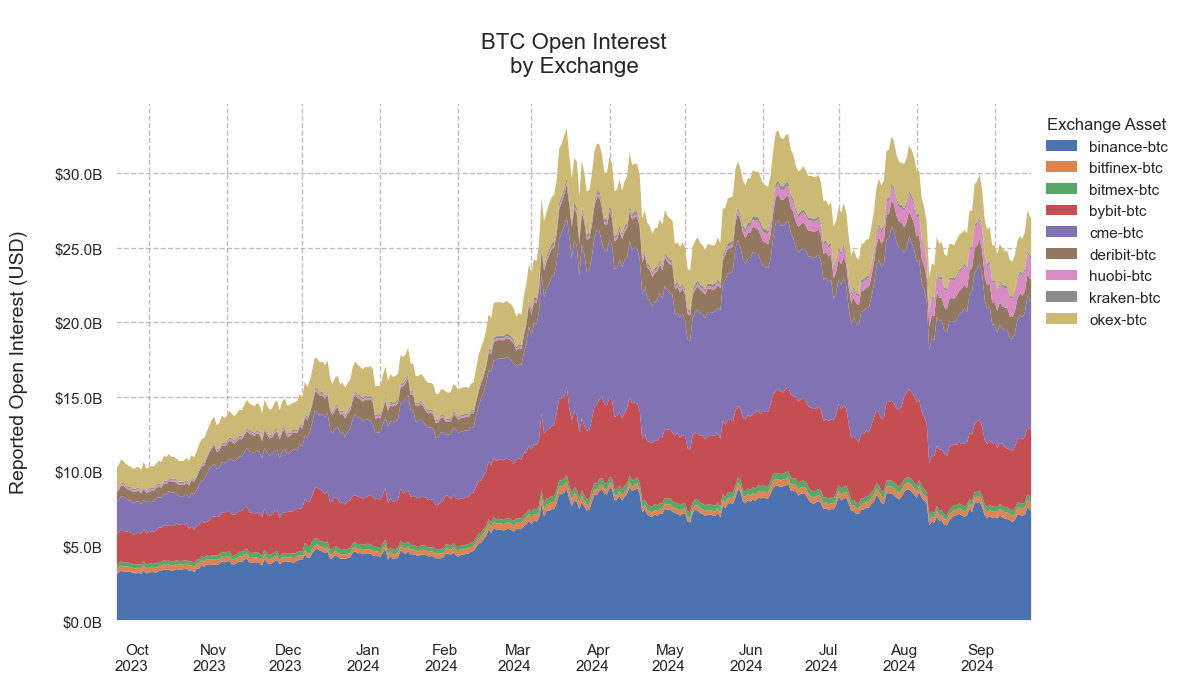

In [16]:
exchanges = btc_oi['exchange_asset'].unique()
dates = btc_oi['time'].unique() 
stacked_data = [btc_oi[btc_oi['exchange_asset'] == exchange]['open_interest_reported_future_usd'].values for exchange in exchanges]

fig, ax = plt.subplots(figsize=(12, 7))
ax.stackplot(dates, stacked_data, labels=exchanges, edgecolor='none')

ax.set_title('\nBTC Open Interest\nby Exchange\n', fontsize=16)
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('Reported Open Interest (USD)\n', fontsize=14)
ax.legend(loc='upper left', title='Exchange Asset', bbox_to_anchor=(1,1), frameon=False)
ax.grid(True, linestyle='--', alpha=0.5, color='gray')
ax.set_facecolor('white')

# Format y-axis in billions of dollars
def billions(x, pos):
    return f'${x * 1e-9:.1f}B'

ax.yaxis.set_major_formatter(FuncFormatter(billions))

ax.set_xlim([btc_oi['time'].min(), btc_oi['time'].max()])
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
fig.autofmt_xdate()
ax.tick_params(axis='x', which='major', pad=10) 
_ = plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Liquidations

Next, we'll take a look at liquidations data. As a reminder, exchanges which offer futures markets utilize a risk management system that will attempt to close a user’s position before the point at which the user begins to owe more than what is in the user's account. The trade or order that closes the user's position is referred to as a liquidation.

This time, we'll use the **get_market_liquidations** client function to pull all BTCUSDT liquidations over the last 24 hours on Binance:

In [17]:
market = 'binance-BTCUSDT-future'

In [18]:
liquidations_df = client.get_market_liquidations(
    markets = market,
    start_time = datetime.utcnow() - timedelta(days=1),
).to_dataframe()
liquidations_df['amount'] = liquidations_df['amount'].astype(np.float64)
liquidations_df['price'] = liquidations_df['price'].astype(np.float64)

In [19]:
liquidations_df.head()

,market,time,coin_metrics_id,amount,price,type,database_time,side
0,binance-BTCUSDT-future,2024-09-15 21:54:34.145000+00:00,1726437274145000000,0.011,59648.0,trade,2024-09-15 21:54:34.297968+00:00,buy
1,binance-BTCUSDT-future,2024-09-15 21:57:52.361000+00:00,1726437472361000000,0.006,59663.1,trade,2024-09-15 21:57:53.574117+00:00,buy
2,binance-BTCUSDT-future,2024-09-15 22:02:17.426000+00:00,1726437737426000000,0.242,59511.0,trade,2024-09-15 22:02:18.244282+00:00,sell
3,binance-BTCUSDT-future,2024-09-15 22:02:19.433000+00:00,1726437739433000000,0.041,59503.1,trade,2024-09-15 22:02:20.362299+00:00,sell
4,binance-BTCUSDT-future,2024-09-15 22:02:33.095000+00:00,1726437753095000000,0.009,59479.2,trade,2024-09-15 22:02:34.376645+00:00,sell


In [20]:
# Get volume-weighted average price of the futures contract from the market-candles endpoint
price = client.get_market_candles(
        markets = market,
        start_time = datetime.utcnow() - timedelta(days=1),
        end_time = datetime.utcnow(),
        frequency='1m'
).to_dataframe()
price['vwap'] = price['vwap'].astype(np.float64)

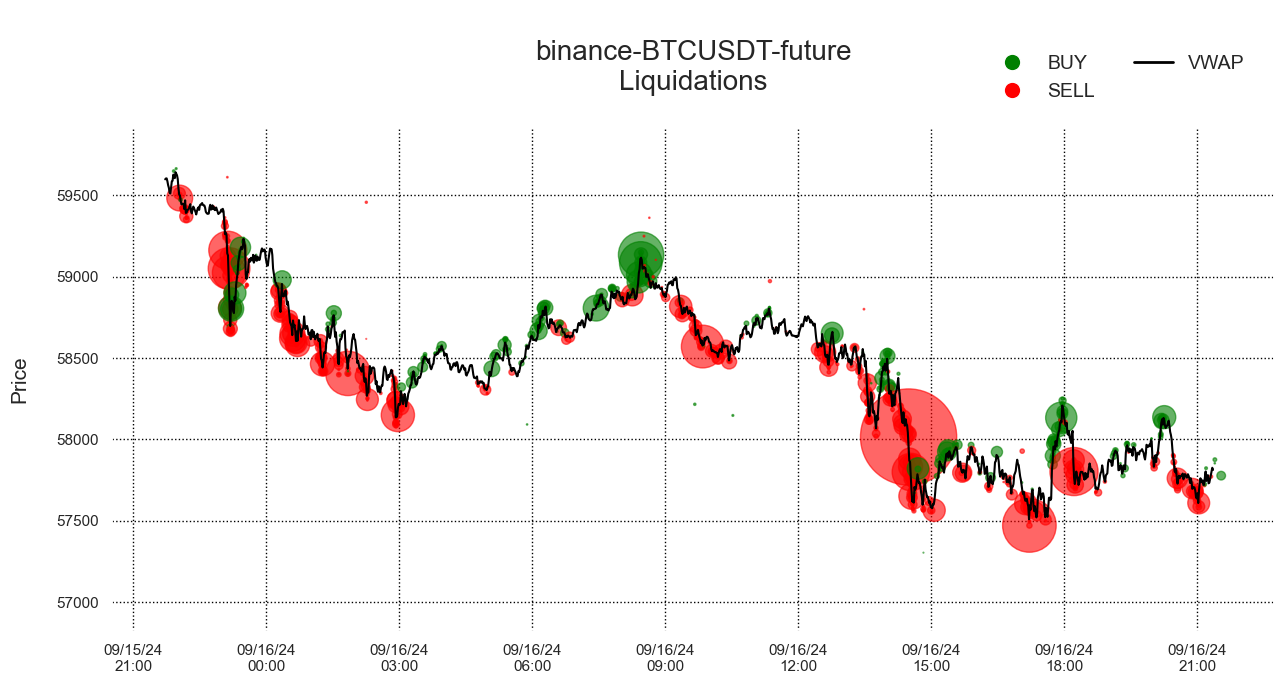

In [21]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

plt.figure(figsize=(13,7))
scaling_factor = 300  # Adjust this value to get the desired point size
color_map = {'buy': 'green', 'sell': 'red'}
liqs = plt.scatter(
    x=liquidations_df['time'],
    y=liquidations_df['price'],
    s=liquidations_df['amount'] * scaling_factor,  # Scale point sizes by the scaling factor
    c=liquidations_df['side'].map(color_map),
    alpha=0.6
)

plt.plot(price['time'], price['vwap'], color='black', linestyle='-', label='VWAP')

mean_price = liquidations_df['price'].mean()
std_price = liquidations_df['price'].std()
plt.ylim(mean_price - 3*std_price, mean_price + 3*std_price)
plt.xlabel("", fontsize=15)
plt.ylabel("Price\n", font='arial',fontsize=15)
plt.title('\n' + str(market) + '\nLiquidations\n', size=20)

# Format the xtick labels
date_format = DateFormatter('%D\n%H:%M')
plt.gca().xaxis.set_major_formatter(date_format)

legend_labels = ['BUY', 'SELL', 'VWAP']
legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map['buy'], markersize=12),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map['sell'], markersize=12),
    plt.Line2D([0], [0], color='black', lw=2)  # Legend entry for VWAP
]
legend = plt.legend(legend_handles, legend_labels, loc='lower right', fontsize=14, ncol=2, framealpha=0, bbox_to_anchor=(0.99, 1.02))

plt.gca().set_facecolor('white')
plt.grid(color='black', linestyle='dotted')

plt.tight_layout() 
plt.show()

Notice that this timeseries also includes the liquidation **type**. Some exchanges report “liquidations orders” in which they will report the creation of a liquidation **order** when a trader’s position initially enters liquidation. When a trader’s position enters liquidation, an exchange will typically enter a limit order at the price at which the trader will be bankruptcy price. The liquidation orders will show the amount of the position that is being liquidated and the liquidation price, but will not represent the matched trades that are executed as a result of the liquidation. Other exchanges will report “liquidation trades” which represent the actual matched **trade** as a result of a liquidation order but will not report liquidation orders. Some exchanges will report both liquidation orders and liquidation trades.

### Aggregated Liquidation Metrics

In addition to examining individual liquidations, we can also leverage aggregated liquidations metrics. This allows us to quickly view the total amount of USD-denominated liquidations that have occurred over large timeframes, without needing to aggregate the amounts at the trade level.

In [22]:
metrics = ['liquidations_reported_future_buy_usd_1h', 'liquidations_reported_future_sell_usd_1h']

In [23]:
liq_catalog = client.catalog_exchange_asset_metrics_v2(metrics=metrics).to_dataframe()
liq_catalog = liq_catalog[liq_catalog['exchange_asset'].str.split('-').str[1] == 'btc']
liq_catalog

,exchange_asset,metrics
61,binance-btc,[{'metric': 'liquidations_reported_future_buy_...
335,bitfinex-btc,[{'metric': 'liquidations_reported_future_buy_...
401,bitmex-btc,[{'metric': 'liquidations_reported_future_buy_...
577,bybit-btc,[{'metric': 'liquidations_reported_future_buy_...
925,deribit-btc,[{'metric': 'liquidations_reported_future_buy_...
978,ftx-btc,[{'metric': 'liquidations_reported_future_buy_...
1213,huobi-btc,[{'metric': 'liquidations_reported_future_buy_...
1475,kraken-btc,[{'metric': 'liquidations_reported_future_buy_...
1688,okex-btc,[{'metric': 'liquidations_reported_future_buy_...


In [24]:
agg_liqs = client.get_exchange_asset_metrics(
    exchange_assets=liq_catalog['exchange_asset'].to_list(),
    metrics = metrics,
    start_time = datetime.utcnow() - timedelta(days=1.5),
    frequency='1h'
).to_dataframe()
agg_liqs.replace('None', np.nan, inplace=True)
agg_liqs[metrics[0]] = agg_liqs['liquidations_reported_future_buy_usd_1h'].astype(np.float64)
agg_liqs['liquidations_reported_future_sell_usd_1h'] = -1 * agg_liqs['liquidations_reported_future_sell_usd_1h'].astype(np.float64)

In [25]:
agg_liqs = agg_liqs.fillna(0)
agg_liqs

,exchange_asset,time,liquidations_reported_future_buy_usd_1h,liquidations_reported_future_sell_usd_1h
0,binance-btc,2024-09-15 10:00:00+00:00,41189.76644,-123119.61981
1,binance-btc,2024-09-15 11:00:00+00:00,2219.32844,-26757.74386
2,binance-btc,2024-09-15 12:00:00+00:00,20766.66452,-540.03552
3,binance-btc,2024-09-15 13:00:00+00:00,166694.89730,-28269.05000
4,binance-btc,2024-09-15 14:00:00+00:00,208587.82170,-319846.10928
...,...,...,...,...
167,okex-btc,2024-09-16 16:00:00+00:00,2309.60000,-231.20680
168,okex-btc,2024-09-16 17:00:00+00:00,753306.85950,-676171.41858
169,okex-btc,2024-09-16 18:00:00+00:00,0.00000,-245113.87800
170,okex-btc,2024-09-16 19:00:00+00:00,0.00000,-18840.23928


In [26]:
btc_total_oi = client.get_asset_metrics(
    assets='btc',
    metrics='open_interest_reported_future_usd',
    frequency='1h', 
    start_time = datetime.utcnow() - timedelta(days=2)
).to_dataframe()
btc_total_oi.head()

,asset,time,open_interest_reported_future_usd
0,btc,2024-09-14 22:00:00+00:00,27085472082.8134
1,btc,2024-09-14 23:00:00+00:00,27086895034.416401
2,btc,2024-09-15 00:00:00+00:00,27089846618.242401
3,btc,2024-09-15 01:00:00+00:00,27103605277.447899
4,btc,2024-09-15 02:00:00+00:00,27206441557.918598


In [27]:
df = agg_liqs

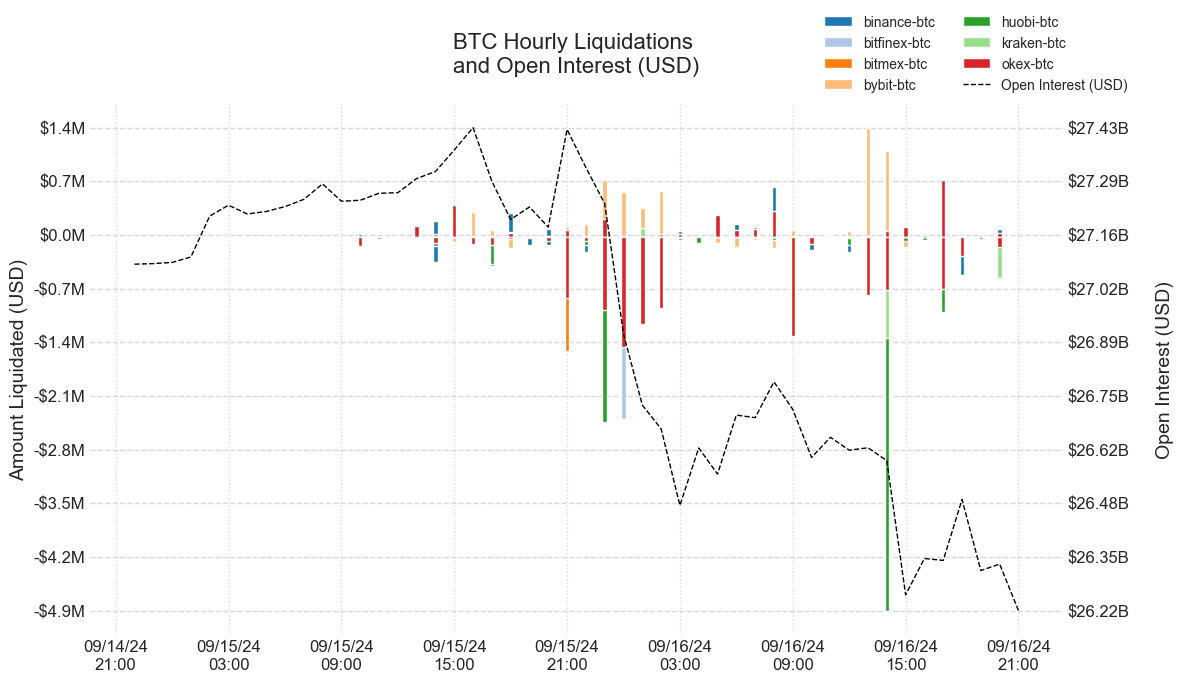

In [28]:
melted_df = df.melt(id_vars=['time', 'exchange_asset'], 
                    value_vars=['liquidations_reported_future_buy_usd_1h', 'liquidations_reported_future_sell_usd_1h'],
                    var_name='transaction_type', value_name='amount')
melted_df['amount'] /= 1e6
melted_df['time'] = melted_df['time'].dt.tz_localize(None)

fig, ax = plt.subplots(figsize=(12,7))
plt.gca().set_facecolor('white')
plt.grid(color='gray', linestyle='dotted',alpha=0.3)
ax2 = ax.twinx()

unique_assets = melted_df['exchange_asset'].unique()
colormap = plt.cm.tab20
colors = {asset: colormap(i) for i, asset in enumerate(unique_assets)}

for asset in unique_assets:
    subset = melted_df[melted_df['exchange_asset'] == asset]
    ax.bar(subset['time'], subset['amount'], width=0.01, label=asset, color=colors[asset]) 

# Plot open interest on secondary y-axis
btc_total_oi['time'] = btc_total_oi['time'].dt.tz_localize(None)
ax2.plot(btc_total_oi['time'], btc_total_oi['open_interest_reported_future_usd'], color='black', label='Open Interest (USD)', linewidth=1, linestyle='--')

ax.set_xlabel('')
ax.set_ylabel('Amount Liquidated (USD)', fontsize=14)
ax2.set_ylabel('\nOpen Interest (USD)', fontsize=14)
ax.set_title('\nBTC Hourly Liquidations \nand Open Interest (USD)\n', fontsize=16)

locator = mdates.HourLocator(interval=6)  
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%D\n%H:%M'))  

# Format y-axis ticks for liquidations
def y_formatter(x, pos):
    if x < 0:
        return f"-${abs(x):.1f}M"
    else:
        return f"${x:.1f}M"

ax.yaxis.set_major_formatter(mticker.FuncFormatter(y_formatter))
ax.yaxis.grid(True, linestyle='--', which='major')  
ax2.yaxis.grid(False)  
ax.yaxis.tick_left()  
ax.tick_params(axis='both', length=0, labelsize=12)
ax2.tick_params(axis='both', length=0, labelsize=12) 

# Format y-axis ticks for open interest in billions
def y_formatter_billion(x, pos):
    return f"${x*1e-9:.2f}B"
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(y_formatter_billion))

num_ticks = 10
yticks = np.linspace(melted_df['amount'].min(), melted_df['amount'].max(), num_ticks)
ax.set_yticks(yticks)

# Set y-ticks based on a similar range
yticks2 = np.linspace(btc_total_oi['open_interest_reported_future_usd'].min(), 
                      btc_total_oi['open_interest_reported_future_usd'].max(), num_ticks)
ax2.set_yticks(yticks2)

# Legend for both axes
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right', fontsize=10, ncol=2, framealpha=0, bbox_to_anchor=(1.08, 1.19))

plt.tight_layout()

for spine in ax2.spines.values():
    spine.set_visible(False)
for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

# Funding Rates

Funding rates are a mechanism that exchanges use to ensure that perpetual futures trade at a price that is close to the price of the underlying spot markets. The funding rate is used to calculate the funding fee which long position holders pay short position holders, or vice versa, as a way to incentivize market participants to take positions that keep perpetual futures prices close to the underlying. 

Coin Metrics funding rate data from the *timeseries/market-funding-rates* endpoint includes the following fields:
- **market:** The id of the market. Market ids use the following naming convention: exchangeName-baseAsset-quoteAsset-spot for spot markets, exchangeName-futuresSymbol-future for futures markets, and exchangeName-optionsSymbol-option for options markets. 

- **time:** The exchange-reported time in ISO 8601 date-time format. Always with nanoseconds precision.
- **rate:** The funding rate expressed as a percentage over the period. For example, if the funding rate is 0.10%, expressed as an 8 hour rate and calculated over the past 8 hours, the rate is 0.0010.
- **period:** The periodicity of the funding rate. If the rate is 0.0010then this rate would be applied every period defined by this field. 
- **interval:** The interval of time over which the funding rate is calculated. 
- **database_time:** The timestamp when the data was saved in the database in ISO 8601 date-time format with nanoseconds precision.

In [29]:
fr_catalog = client.catalog_market_funding_rates_v2(exchange='binance').to_dataframe()

In [30]:
fr_catalog

,market,min_time,max_time
0,binance-1000BONKUSDC-future,2024-05-01 00:00:00+00:00,2024-09-16 20:00:00+00:00
1,binance-1000BONKUSDT-future,2023-11-22 16:00:00+00:00,2024-09-16 20:00:00+00:00
2,binance-1000BTTCUSDT-future,2022-01-26 08:00:00.001000+00:00,2022-04-11 08:00:00+00:00
3,binance-1000FLOKIUSDT-future,2023-05-06 16:00:00+00:00,2024-09-16 16:00:00+00:00
4,binance-1000LUNCBUSD-future,2022-05-30 16:00:00.005000+00:00,2023-06-08 08:00:00+00:00
...,...,...,...
442,binance-ZILUSDT-future,2020-06-17 08:00:00.007000+00:00,2024-09-16 16:00:00+00:00
443,binance-ZILUSD_PERP-future,2022-04-06 08:00:00.013000+00:00,2022-12-26 08:00:00.014000+00:00
444,binance-ZKUSDT-future,2024-06-17 12:00:00+00:00,2024-09-16 20:00:00+00:00
445,binance-ZROUSDT-future,2024-06-20 16:00:00+00:00,2024-09-16 20:00:00+00:00


In [31]:
fr_markets = [
    'bitmex-XBTUSD-future',
    'bybit-BTCUSD-future',
    'okex-BTC-USD-SWAP-future'
]

In [32]:
fr_raw = client.get_market_funding_rates(
    markets = fr_markets,
    start_time=datetime.utcnow() - timedelta(days=7),
).to_dataframe()
fr_raw

,market,time,database_time,rate,period,interval
0,bitmex-XBTUSD-future,2024-09-10 04:00:00+00:00,2024-09-10 04:00:55.910555+00:00,-0.000116,08:00:00,08:00:00
1,bitmex-XBTUSD-future,2024-09-10 12:00:00+00:00,2024-09-10 12:00:40.929397+00:00,0.000037,08:00:00,08:00:00
2,bitmex-XBTUSD-future,2024-09-10 20:00:00+00:00,2024-09-10 20:00:01.451626+00:00,0.000048,08:00:00,08:00:00
3,bitmex-XBTUSD-future,2024-09-11 04:00:00+00:00,2024-09-11 04:00:15.978545+00:00,0.0001,08:00:00,08:00:00
4,bitmex-XBTUSD-future,2024-09-11 12:00:00+00:00,2024-09-11 12:00:04.727025+00:00,0.0001,08:00:00,08:00:00
...,...,...,...,...,...,...
58,okex-BTC-USD-SWAP-future,2024-09-15 08:00:00+00:00,2024-09-15 08:00:05.108766+00:00,0.000062,08:00:00,08:00:00
59,okex-BTC-USD-SWAP-future,2024-09-15 16:00:00+00:00,2024-09-15 16:00:12.545520+00:00,0.000061,08:00:00,08:00:00
60,okex-BTC-USD-SWAP-future,2024-09-16 00:00:00+00:00,2024-09-16 00:00:04.734967+00:00,0.000046,08:00:00,08:00:00
61,okex-BTC-USD-SWAP-future,2024-09-16 08:00:00+00:00,2024-09-16 08:00:07.052638+00:00,0.000013,08:00:00,08:00:00


In [33]:
# Convert 'time' to datetime for plotting, if not already in this format
fr_raw['time'] = pd.to_datetime(fr_raw['time'])
fr_raw = fr_raw.sort_values(by='time')
for column in fr_raw.columns:
    if column not in ['time', 'market']:
        fr_raw[column] = pd.to_numeric(fr_raw[column], errors='coerce') * 100

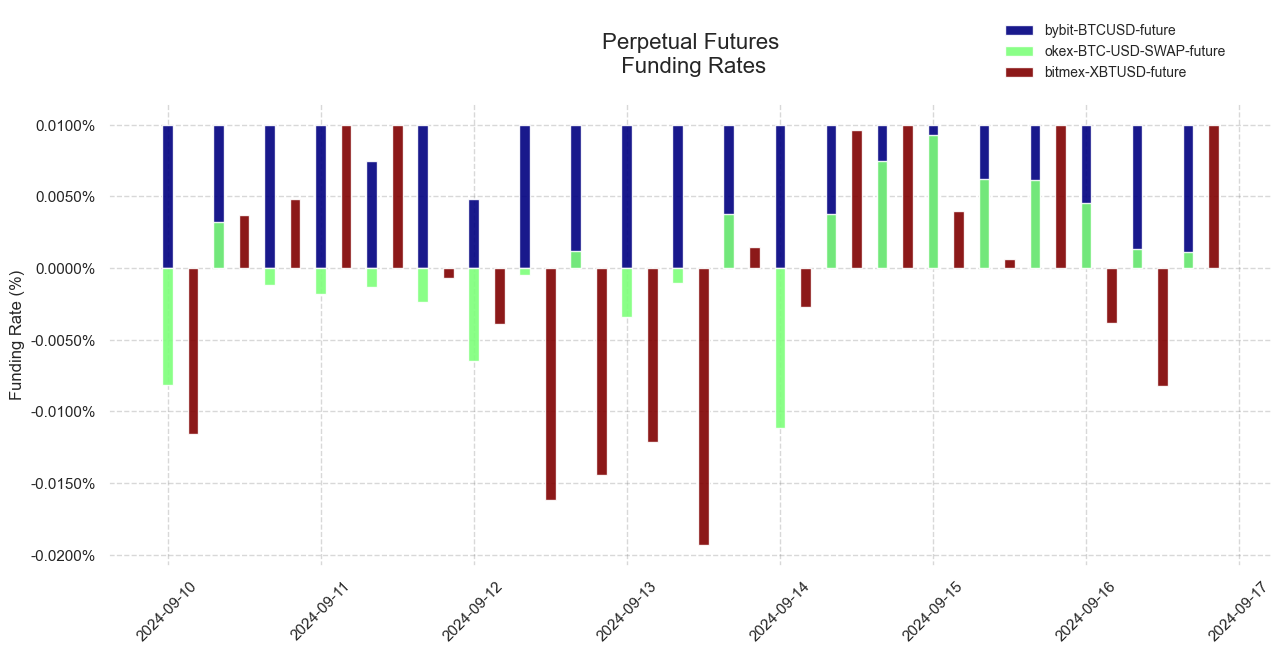

In [34]:
# Create a color map
markets = fr_raw['market'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(markets)))  # Generating a color for each market
color_map = dict(zip(markets, colors))

# Plotting
plt.figure(figsize=(15, 6))
plt.gca().set_facecolor('white')
# Plot bars for each market
for market in markets:
    market_data = fr_raw[fr_raw['market'] == market]
    plt.bar(market_data['time'], market_data['rate'], color=color_map[market], label=market, width=0.07, alpha=0.9)

formatter = mticker.FuncFormatter(lambda y, _: '{:.4f}%'.format(y))
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True, linestyle='--', which='major', color='gray', alpha=0.3)  
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Funding Rate (%)')
plt.title('\nPerpetual Futures\n Funding Rates\n',fontsize=16)
plt.legend(loc='upper left', fontsize=10, bbox_to_anchor=(0.76,1.2), frameon=False)

plt.show()

## Aggregated Funding Rates

Coin Metrics also calculates several aggregated funding rate metrics.

**Aggregate Funding Rate** is the average funding rate weighted by open interest, published once per hour and representing the average funding rate converted to 8 hour, 1 day, 30 day, and 1 year time periods.
- **futures_aggregate_funding_rate_usd_margin_*:** metrics represent the average funding rate weighted by open interest from perpetual futures markets where the margin asset is U.S. dollars or stablecoins converted to a specified time period.
- **futures_aggregate_funding_rate_coin_margin_*:** represent the average funding rate weighted by open interest from perpetual futures markets where the margin asset is equivalent to the underlying base asset converted to a specified period.
- **futures_aggregate_funding_rate_all_margin_*:** represent the average funding rate weighted by open interest from all perpetual futures markets, regardless of the margin asset, converted to a specified time period.

In [35]:
btc_fr = client.get_asset_metrics(
    assets='btc',
    start_time='2023-10-01',
    metrics = [
        'futures_aggregate_funding_rate_all_margin_1d_period',
        'futures_aggregate_funding_rate_all_margin_30d_period',
        'futures_aggregate_funding_rate_all_margin_1y_period'
        ]
).to_dataframe()

In [36]:
btc_fr.head()

,asset,time,futures_aggregate_funding_rate_all_margin_1d_period,futures_aggregate_funding_rate_all_margin_1y_period,futures_aggregate_funding_rate_all_margin_30d_period
0,btc,2023-10-01 00:00:00+00:00,0.000101,0.036712,0.003017
1,btc,2023-10-02 00:00:00+00:00,0.000087,0.031662,0.002602
2,btc,2023-10-03 00:00:00+00:00,0.000086,0.031306,0.002573
3,btc,2023-10-04 00:00:00+00:00,0.000109,0.039942,0.003283
4,btc,2023-10-05 00:00:00+00:00,0.000071,0.025923,0.002131


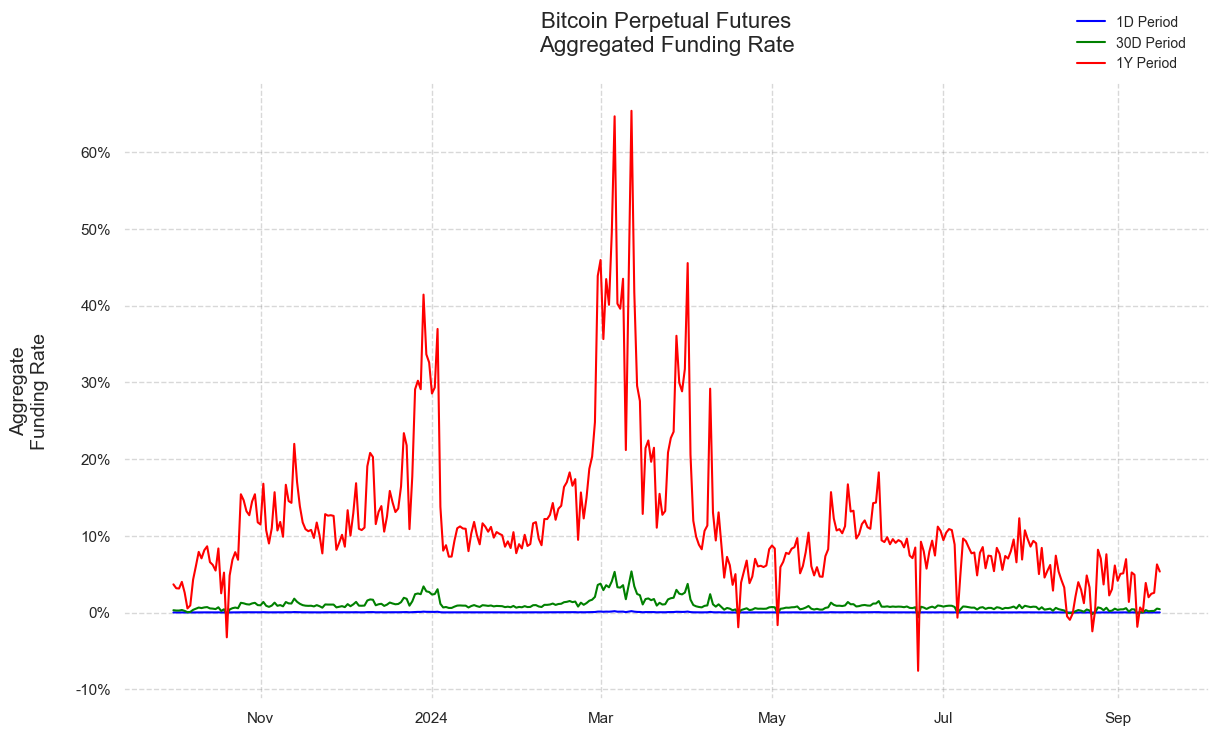

In [37]:
plt.figure(figsize=(14, 8))

plt.plot(btc_fr['time'], btc_fr['futures_aggregate_funding_rate_all_margin_1d_period'] * 100, label='1D Period', color='blue')
plt.plot(btc_fr['time'], btc_fr['futures_aggregate_funding_rate_all_margin_30d_period'] * 100, label='30D Period', color='green')
plt.plot(btc_fr['time'], btc_fr['futures_aggregate_funding_rate_all_margin_1y_period'] * 100, label='1Y Period', color='red')

plt.gca().set_facecolor('white')
plt.grid(color='gray', linestyle='dotted', alpha=0.3)

plt.title('Bitcoin Perpetual Futures\nAggregated Funding Rate\n', fontsize=16)
plt.xlabel('')
plt.ylabel('Aggregate\nFunding Rate\n', fontsize=14)
plt.grid(True, alpha=0.3, linestyle='--')

# Set the formatter for the Y-axis to display percentages
formatter = mticker.FuncFormatter(lambda y, _: '{:.0f}%'.format(y))
plt.gca().yaxis.set_major_formatter(formatter)

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
plt.legend(loc='upper right', fontsize=10, ncol=1, framealpha=0, bbox_to_anchor=(0.99, 1.13))
plt.show()

###  Plotting a heatmap of BTC funding rates across exchanges

In [46]:
btc_exch_fr_catalog = client.catalog_exchange_asset_metrics_v2(metrics='futures_aggregate_funding_rate_all_margin_1y_period').to_dataframe()
btc_exch_fr_catalog = btc_exch_fr_catalog[btc_exch_fr_catalog['exchange_asset'].str.contains(r'-btc$', case=False)]
btc_exch_fr_catalog

,exchange_asset,metrics
60,binance-btc,[{'metric': 'futures_aggregate_funding_rate_al...
330,bitfinex-btc,[{'metric': 'futures_aggregate_funding_rate_al...
397,bitmex-btc,[{'metric': 'futures_aggregate_funding_rate_al...
569,bybit-btc,[{'metric': 'futures_aggregate_funding_rate_al...
909,deribit-btc,[{'metric': 'futures_aggregate_funding_rate_al...
952,ftx-btc,[{'metric': 'futures_aggregate_funding_rate_al...
1162,huobi-btc,[{'metric': 'futures_aggregate_funding_rate_al...
1418,kraken-btc,[{'metric': 'futures_aggregate_funding_rate_al...
1628,okex-btc,[{'metric': 'futures_aggregate_funding_rate_al...


In [39]:
btc_fr_exchanges = client.get_exchange_asset_metrics(
    exchange_assets=btc_exch_fr_catalog['exchange_asset'].to_list(),
    start_time='2023-01-01',
    end_time='2023-12-31',
    metrics = 'futures_aggregate_funding_rate_all_margin_1y_period',
    frequency='1d'
).to_dataframe()
btc_fr_exchanges

,exchange_asset,time,futures_aggregate_funding_rate_all_margin_1y_period
0,binance-btc,2023-01-01 00:00:00+00:00,0.1095
1,binance-btc,2023-01-02 00:00:00+00:00,0.012148
2,binance-btc,2023-01-03 00:00:00+00:00,0.046845
3,binance-btc,2023-01-04 00:00:00+00:00,0.041311
4,binance-btc,2023-01-05 00:00:00+00:00,0.061746
...,...,...,...
2915,okex-btc,2023-12-27 00:00:00+00:00,0.376005
2916,okex-btc,2023-12-28 00:00:00+00:00,0.254648
2917,okex-btc,2023-12-29 00:00:00+00:00,0.536332
2918,okex-btc,2023-12-30 00:00:00+00:00,0.455873


In [40]:
df = btc_fr_exchanges
pivot_df = df.pivot(index='exchange_asset', columns='time', values='futures_aggregate_funding_rate_all_margin_1y_period')
pivot_df = pivot_df.astype(float)
pivot_df

time,2023-01-01 00:00:00+00:00,2023-01-02 00:00:00+00:00,2023-01-03 00:00:00+00:00,2023-01-04 00:00:00+00:00,2023-01-05 00:00:00+00:00,2023-01-06 00:00:00+00:00,2023-01-07 00:00:00+00:00,2023-01-08 00:00:00+00:00,2023-01-09 00:00:00+00:00,2023-01-10 00:00:00+00:00,...,2023-12-22 00:00:00+00:00,2023-12-23 00:00:00+00:00,2023-12-24 00:00:00+00:00,2023-12-25 00:00:00+00:00,2023-12-26 00:00:00+00:00,2023-12-27 00:00:00+00:00,2023-12-28 00:00:00+00:00,2023-12-29 00:00:00+00:00,2023-12-30 00:00:00+00:00,2023-12-31 00:00:00+00:00
exchange_asset,,,,,,,,,,,,,,,,,,,,,
binance-btc,0.109500,0.012148,0.046845,0.041311,0.061746,0.077517,0.096432,0.089722,0.057266,0.017031,...,0.281263,0.206533,0.154560,0.195473,0.425674,0.383043,0.379663,0.549031,0.457254,0.387193
bitfinex-btc,0.240054,0.382189,0.211039,0.229558,0.074891,0.131655,0.131765,0.160125,0.113086,0.129979,...,0.270820,0.156269,0.125486,0.308607,0.465474,0.147093,0.655639,0.688972,0.453521,0.265981
bitmex-btc,0.109500,-0.147477,-0.027653,-0.075540,0.109140,0.058906,-0.078846,0.109500,0.109500,0.109500,...,0.124057,0.120385,0.105715,0.111534,0.109102,0.118988,0.178754,0.469497,0.127023,0.127770
bybit-btc,0.332716,0.328811,0.106620,0.109500,0.108059,0.056104,0.076392,-0.001772,0.090156,-0.066673,...,0.109500,0.109500,0.109500,0.109500,0.109500,0.109500,0.109500,0.109500,0.109500,0.109500
deribit-btc,0.004014,-0.004356,0.000194,-0.000777,-0.000004,-0.003702,-0.000003,0.000411,0.000128,0.009021,...,0.162735,0.222283,0.009642,0.074016,0.344480,0.472755,0.558913,0.589233,0.398686,0.509796
huobi-btc,0.109500,0.099561,0.109500,0.109500,-0.031955,0.109500,0.109500,0.815508,-0.012098,0.062326,...,0.261585,1.119745,0.330376,0.585262,0.487209,1.132452,0.657258,0.739781,0.549361,0.700592
kraken-btc,0.030208,0.040457,-0.095853,-0.027047,0.061041,-0.130703,-0.061580,0.036233,-0.006607,0.217927,...,0.316554,0.166807,0.167266,0.130185,0.474480,0.381600,0.226822,0.361264,0.169106,0.289377
okex-btc,0.209290,0.191624,-0.019627,0.007415,0.206787,0.104460,-0.038630,0.124934,0.025828,0.020786,...,0.396916,0.417243,-0.002470,0.271116,0.250061,0.376005,0.254648,0.536332,0.455873,0.548358


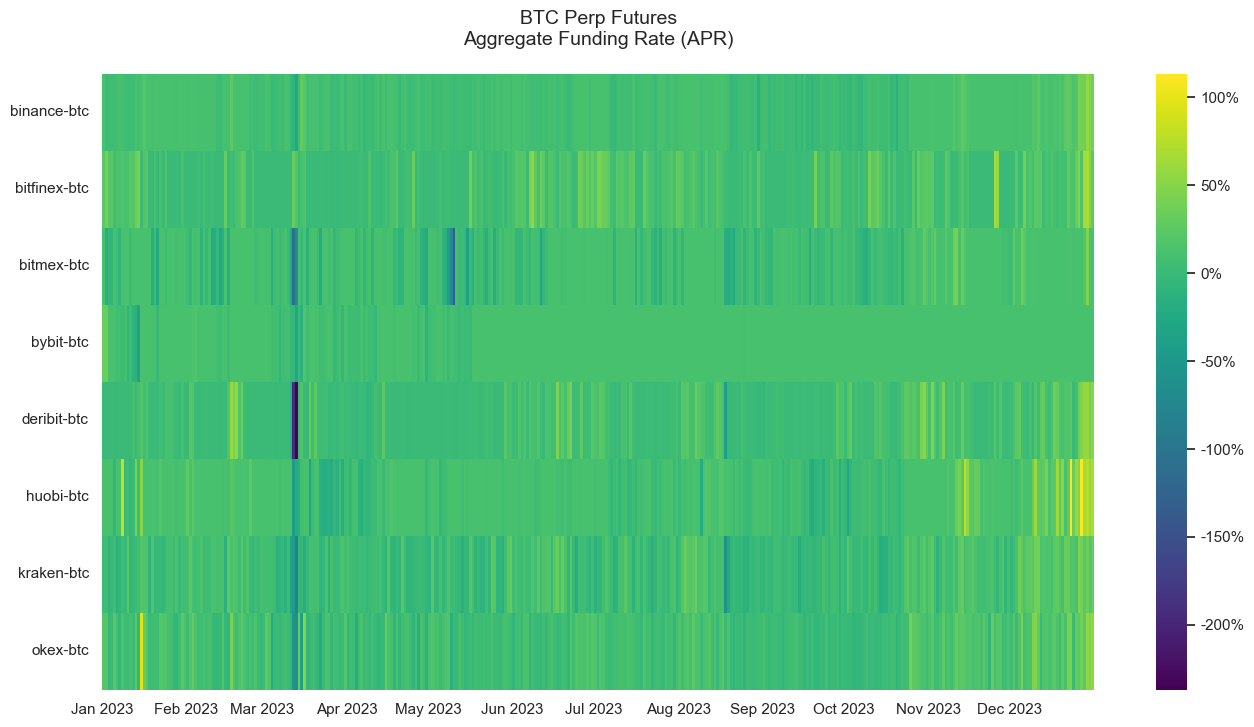

In [41]:
# Plotting the heatmap
plt.figure(figsize=(16, 8))
ax = sns.heatmap(pivot_df, cmap='viridis', annot=False)
plt.title('BTC Perp Futures\nAggregate Funding Rate (APR)\n', fontsize=14)

# Set x-ticks for monthly intervals
date_labels = [pd.to_datetime(label).strftime('%b %Y') for label in pivot_df.columns]
monthly_intervals = [i for i, label in enumerate(pivot_df.columns) if pd.to_datetime(label).day == 1]

ax.set_xticks(monthly_intervals)
ax.set_xticklabels([date_labels[i] for i in monthly_intervals], rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Formatting colorbar labels as percentages
colorbar = ax.collections[0].colorbar
colorbar.ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.0%}'))

plt.xlabel('')
plt.ylabel('')
plt.show()

## Cumulative Funding Rate

**Cumulative Funding Rate** is the cumulative average funding rate that would be accumulated by contract holders over a specified time period. Published once per hour, representing the cumulative realized funding rate over the previous 1 day, 7 day, and 30 day time periods.
- **futures_cumulative_funding_rate_usd_margin_*:** metrics represent the cumulative average funding rate weighted by open interest from futures markets where the margin asset is U.S. dollars or stablecoins over the previous specified time period.
- **futures_cumulative_funding_rate_coin_margin_*:** metrics represent the cumulative average funding rate weighted by open interest from futures markets where the margin asset is equivalent to the underlying base asset over the previous specified time period.
- **futures_cumulative_funding_rate_all_margin_*:** metrics represent the cumulative average funding rate weighted by open interest from all futures markets, regardless of the margin asset, over the previous specified time period.

In [42]:
btc_cumulative_fr = client.get_asset_metrics(
    assets='btc',
    start_time='2023-01-01',
    end_time='2023-12-31',
    metrics = [
        'futures_cumulative_funding_rate_all_margin_rolling_1d',
        'futures_cumulative_funding_rate_all_margin_rolling_7d',
        'futures_cumulative_funding_rate_all_margin_rolling_30d'
        ]
).to_dataframe()
btc_cumulative_fr.head()

,asset,time,futures_cumulative_funding_rate_all_margin_rolling_1d,futures_cumulative_funding_rate_all_margin_rolling_30d,futures_cumulative_funding_rate_all_margin_rolling_7d
0,btc,2023-01-01 00:00:00+00:00,0.00041,0.002146,0.0015
1,btc,2023-01-02 00:00:00+00:00,0.000358,0.002479,0.001736
2,btc,2023-01-03 00:00:00+00:00,0.000128,0.002587,0.001735
3,btc,2023-01-04 00:00:00+00:00,0.000176,0.002641,0.001754
4,btc,2023-01-05 00:00:00+00:00,0.000194,0.002957,0.001745


In [43]:
for column in btc_cumulative_fr.columns:
    if column != 'time':
        btc_cumulative_fr[column] = pd.to_numeric(btc_cumulative_fr[column], errors='coerce')

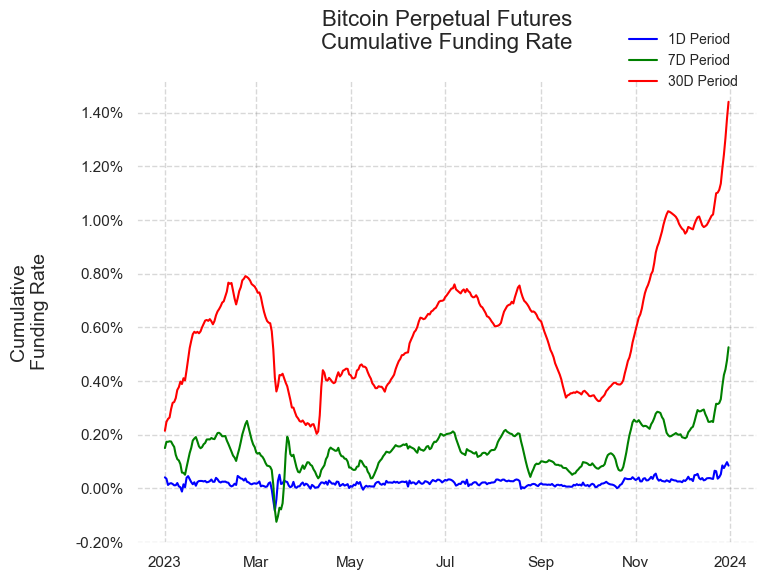

In [44]:
# Convert the 'time' column to datetime format if it's not already
btc_cumulative_fr['time'] = pd.to_datetime(btc_cumulative_fr['time'], errors='coerce')

# Ensure 'futures_cumulative_funding_rate_all_margin_7d' is numeric, replacing non-numeric values with numpy.nan
btc_cumulative_fr['futures_cumulative_funding_rate_all_margin_7d'] = pd.to_numeric(btc_cumulative_fr['futures_cumulative_funding_rate_all_margin_rolling_7d'], errors='coerce')

# Plotting with safe checking
valid_7d_indices = ~btc_cumulative_fr['futures_cumulative_funding_rate_all_margin_rolling_7d'].isna()
valid_30d_indices = ~btc_cumulative_fr['futures_cumulative_funding_rate_all_margin_rolling_30d'].isna()

plt.plot(btc_cumulative_fr['time'], btc_cumulative_fr['futures_cumulative_funding_rate_all_margin_rolling_1d'] * 100, label='1D Period', color='blue')
plt.plot(btc_cumulative_fr['time'][valid_7d_indices], btc_cumulative_fr['futures_cumulative_funding_rate_all_margin_rolling_7d'][valid_7d_indices] * 100, label='7D Period', color='green')
plt.plot(btc_cumulative_fr['time'][valid_30d_indices], btc_cumulative_fr['futures_cumulative_funding_rate_all_margin_rolling_30d'][valid_30d_indices] * 100, label='30D Period', color='red')

plt.gca().set_facecolor('white')
plt.grid(color='gray', linestyle='dotted', alpha=0.3)

plt.title('Bitcoin Perpetual Futures\nCumulative Funding Rate\n', fontsize=16)
plt.xlabel('')
plt.ylabel('Cumulative\nFunding Rate\n', fontsize=14)
plt.grid(True, alpha=0.3, linestyle='--')

formatter = mticker.FuncFormatter(lambda y, _: '{:.2f}%'.format(y))
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
plt.legend(loc='upper right', fontsize=10, ncol=1, framealpha=0, bbox_to_anchor=(0.99, 1.13))
plt.show()